## 1. Introduction and Data Description:

### Overview of the project:
#### The primary objective of the Metro Interstate Traffic Volume dataset is to analyze and predict traffic volumes on a major metropolitan highway system. The dataset contains information on traffic volume, weather conditions, time of day, and special events such as holidays. By leveraging this data, the goal is to identify patterns and factors that influence traffic flow, such as weather, time of day, and holidays.

#### Key objectives of analyzing this dataset include:
- Traffic Pattern Analysis: Understanding the variation in traffic volume across different hours of the day, weekdays, weekends, and holidays.
- Impact of Weather Conditions: Investigating how different weather conditions (e.g., rain, snow, temperature) affect traffic volumes.
- Holiday and Event Effects: Identifying how holidays and special events influence traffic behavior, with an emphasis on high-traffic and low-traffic days.
- Prediction Modeling: Building predictive models to estimate traffic volume based on historical data, weather forecasts, and temporal information, aiding in traffic management, route planning, and urban mobility solutions.

The ultimate aim is to provide insights that can assist transportation authorities in managing traffic congestion, optimizing traffic light timings, and making data-driven decisions to improve urban transportation infrastructure.


### 2. Data Description
| Variable Name       | Role    | Type          | Description                                              | Units   |
|---------------------|---------|---------------|----------------------------------------------------------|---------|
| holiday             | Feature | Categorical   | US National holidays plus regional holiday, Minnesota State Fair   |
| temp                | Feature | Continuous    | Average temp in Kelvin                                   | Kelvin  |
| rain_1h             | Feature | Continuous    | Amount in mm of rain that occurred in the hour           | mm      |
| snow_1h             | Feature | Continuous    | Amount in mm of snow that occurred in the hour           | mm      |
| clouds_all          | Feature | Integer       | Percentage of cloud cover                                | %       |
| weather_main        | Feature | Categorical   | Short textual description of the current weather         |         |
| weather_description | Feature | Categorical   | Longer textual description of the current weather        |         |
| date_time           | Feature | Date          | Hour of the data collected in local CST time             |         |
| traffic_volume      | Target  | Integer       | Hourly I-94 ATR 301 reported westbound traffic volume    |         |


## 3. Data Preprocessing and Cleaning
- The process began by loading the Metro Interstate Traffic Volume dataset from a CSV file into a pandas DataFrame. An initial inspection of the data was performed using the head() and info() methods. This revealed the structure of the dataset, including:
48,204 entries
- 9 columns: holiday, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, and traffic_volume
- A mix of data types: float64, int64, and object (string)

### Handling Missing Values
- The inspection revealed that the 'holiday' column contained many null values. To ensure a thorough check for missing data: Null value placeholders like empty strings, spaces, "None", and "Null" were replaced with NaN in object-type columns.
- The percentage of missing values for each column was calculated.
- It was found that the 'holiday' column had 99.87% missing values, while other columns had no missing data.

### Duplicate Removal
- Duplicate rows were identified using the duplicated() method. These duplicates were then removed using drop_duplicates(), ensuring each observation in the dataset was unique.

### Outlier Detection and Removal
- Outliers were handled using the Interquartile Range (IQR) method: For each numerical column, the IQR was calculated.
- Data points falling below Q1 - 1.5IQR or above Q3 + 1.5IQR were considered outliers.
- These outliers were removed, affecting approximately 7.3% of the original data.

### Feature Engineering
- To enrich the dataset and potentially improve model performance, several new features were created: From the 'date_time' column: Year, month, day, and hour were extracted.
- A 'weekday' feature (0-6) was created.
- An 'is_weekend' binary feature was derived (1 for Saturday/Sunday, 0 otherwise).
- Temperature conversion: The 'temp' column (in Kelvin) was converted to Celsius for easier interpretation.
- Rush hour identification: A binary 'is_rush_hour' feature was created, marking peak traffic times (7-9 AM and 4-6 PM).

### Data Transformation
- Despite the high percentage of missing values, the 'holiday' column was retained: Missing values in the 'holiday' column were replaced with 'Non-Holiday' instead of being dropped.
- This decision preserves potentially valuable information about holidays while addressing the missing data issue.

These preprocessing steps resulted in a refined dataset with enhanced features, ready for exploratory data analysis and modeling. The process addressed key data quality issues and enriched the dataset with potentially valuable derived features, setting a strong foundation for subsequent analysis of metro interstate traffic volumes.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_traffic = pd.read_csv('./Metro_Interstate_Traffic_Volume.csv')
df_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### we can see there are many null values in the holiday column and no null values in other column but just to validate we will check if there is any empty or string as null value in object type columns.


In [9]:
number_cols = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
object_cols = ['weather_main','weather_description','date_time','holiday']
df_traffic[object_cols]  = df_traffic[object_cols].replace(["", " ","None","Null"], np.nan)

In [10]:
## calculating the null percentage of each column after replacing the values
df_traffic.isna().sum()/df_traffic.shape[0]*100

holiday                99.873454
temp                    0.000000
rain_1h                 0.000000
snow_1h                 0.000000
clouds_all              0.000000
weather_main            0.000000
weather_description     0.000000
date_time               0.000000
traffic_volume          0.000000
dtype: float64

## Checking Duplicates

In [12]:
df_traffic.duplicated().sum()

17

In [13]:
# Dropping all the duplicates
df_traffic.drop_duplicates(inplace=True)

In [14]:
## checking again to validate the duplicates
df_traffic.duplicated().sum()

0

### No Duplicated found

In [16]:
## checking outlier in the data

# Function to calculate the lower and upper bounds based on the IQR method
def outlier_removal(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Keep only the rows that are not outliers
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Remove outliers from the DataFrame
df_traffic_no_outlier = outlier_removal(df_traffic, number_cols)

In [17]:
((df_traffic.shape[0]-df_traffic_no_outlier.shape[0])/df_traffic.shape[0])*100

7.338078734928508

### We can see a 7.3% outleirs found in the original data

In [19]:
import warnings
warnings.filterwarnings("ignore")

## Data transformation and feature engineering

In [21]:
# Extract date and time features
# Purpose: Generate useful predictors from the date_time column.
df_traffic['date_time'] = pd.to_datetime(df_traffic['date_time'])
df_traffic['year'] = df_traffic['date_time'].dt.year
df_traffic['month'] = df_traffic['date_time'].dt.month
df_traffic['day'] = df_traffic['date_time'].dt.day
df_traffic['hour'] = df_traffic['date_time'].dt.hour
df_traffic['weekday'] = df_traffic['date_time'].dt.weekday
df_traffic['is_weekend'] = df_traffic['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [22]:
df_traffic['holiday'] = df_traffic['holiday'].replace(np.nan, 'Non-Holiday')

In [23]:
# Transform temperature from Kelvin to Celsius
# Purpose: Make temperature values more interpretable.
df_traffic['temp_celsius'] = df_traffic['temp'] - 273.15

In [24]:
# Create a rush hour feature
# Purpose: Capture peak traffic times in the morning and evening.
def rush_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 18:
        return 1
    return 0

df_traffic['is_rush_hour'] = df_traffic['hour'].apply(rush_hour)

## Now that we have clean data we will porform EDA to get insights on the independent varaibles and target variable

# 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis

In [28]:
## Summary Statistics (3 points)
# Purpose: Understand the distribution and central tendencies of numerical features.
print("Summary Statistics:")
print(df_traffic.describe())  # Numerical summary

Summary Statistics:
               temp       rain_1h       snow_1h    clouds_all  \
count  48187.000000  48187.000000  48187.000000  48187.000000   
mean     281.204995      0.334382      0.000222     49.365451   
min        0.000000      0.000000      0.000000      0.000000   
25%      272.160000      0.000000      0.000000      1.000000   
50%      282.450000      0.000000      0.000000     64.000000   
75%      291.806000      0.000000      0.000000     90.000000   
max      310.070000   9831.300000      0.510000    100.000000   
std       13.338738     44.797033      0.008169     39.015213   

                           date_time  traffic_volume          year  \
count                          48187    48187.000000  48187.000000   
mean   2016-01-05 06:49:48.133729024     3259.618134   2015.512047   
min              2012-10-02 09:00:00        0.000000   2012.000000   
25%              2014-02-06 07:30:00     1192.500000   2014.000000   
50%              2016-06-10 21:00:00     337

## Insights
### Traffic Volume
- Dataset contains 48,187 observations spanning October 2012 to September 2018
- Average traffic volume is 3,260 vehicles with high variability (std = 1,987)
- Traffic ranges from 0 to 7,280 vehicles

### Weather Conditions
- Temperature varies significantly (-273.15°C to 36.92°C, mean = 8.06°C)
- Precipitation is minimal (mean rain = 0.33mm, mean snow = 0.0002mm)
- Cloud cover averages 49.37% (range: 0-100%)

### Temporal Patterns
- 28.4% of observations occur on weekends
- 25% of observations are during rush hours
- Average observation time is around 11:24 AM (hour mean = 11.40)

These statistics provide essential context for understanding traffic patterns and their relationship with weather conditions.
Visualized target column distributions to identify skewness or outliers


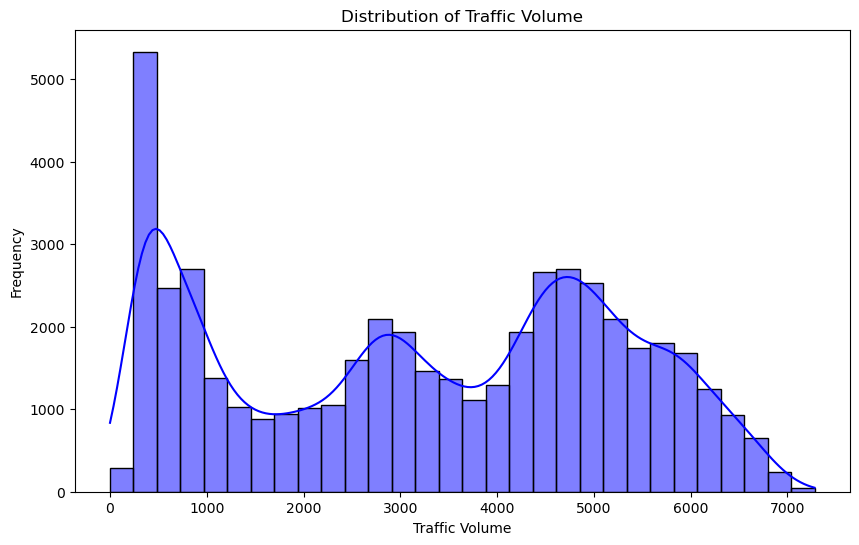

In [30]:
# Purpose: Visualize distributions and identify skewness or outliers.
# Traffic Volume Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_traffic['traffic_volume'], bins=30, kde=True, color='blue')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

The traffic volume histogram displays three distinct peaks, revealing a **trimodal distribution**:

- First peak around 500 vehicles with the highest frequency (~5000 counts)
- Second peak near 3000 vehicles with moderate frequency (~2000 counts)
- Third peak around 5000 vehicles with sustained frequency (~2500 counts)

The distribution is right-skewed, ranging from 0 to 7000 vehicles. A smooth kernel density estimation line (blue curve) highlights these three modes clearly, suggesting regular patterns in traffic flow corresponding to likely off-peak, normal, and peak traffic conditions.

The gradual decline in frequency at higher volumes (>6000) indicates fewer instances of extremely heavy traffic.

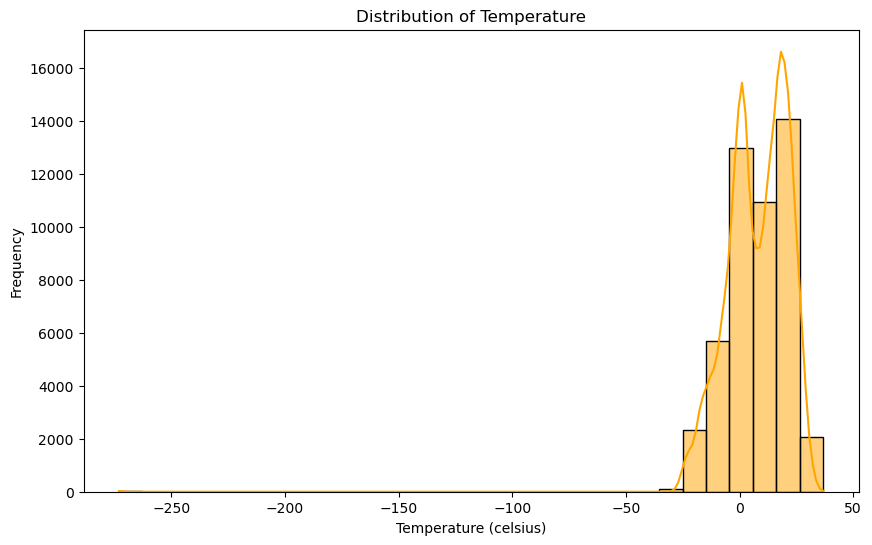

In [32]:
# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_traffic['temp_celsius'], bins=30, kde=True, color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (celsius)')
plt.ylabel('Frequency')
plt.show()

## Insights:
The temperature distribution histogram shows a concentrated pattern between -25 to 25 degree censius with a maximum frequency around 16,000 observations. The data is left-skewed, with the bulk of measurements clustering in the higher temperature range. Almost no observations exist below 250K, and the distribution features a sharp peak, indicating a very specific temperature range dominates the dataset. The smooth orange line overlaying the histogram suggests a relatively normal distribution within this narrow temperature band.

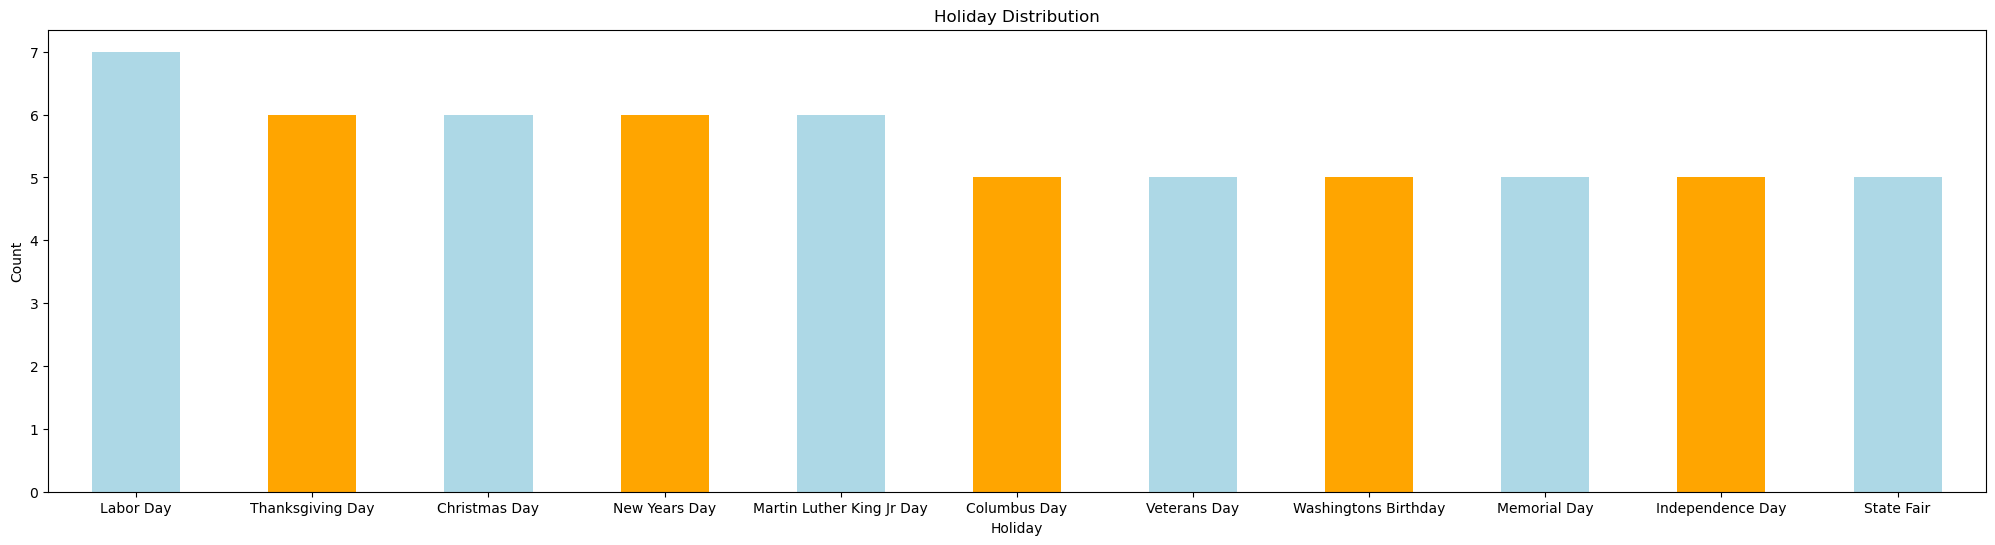

In [34]:
import matplotlib.pyplot as plt

# Generate the value count plot for the 'holiday' column
plt.figure(figsize=(25, 6))
df_traffic[df_traffic['holiday'] != 'Non-Holiday']['holiday'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Holiday Distribution')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: rotate x labels to make them more readable
plt.show()


## Insights: 
From the above grapgh, we can clearly see the frequency of Labor Day is the highest(7) and state fair is the lowest(5) but the frequency is almost uniform

# 4.2 Bivariate Analysis

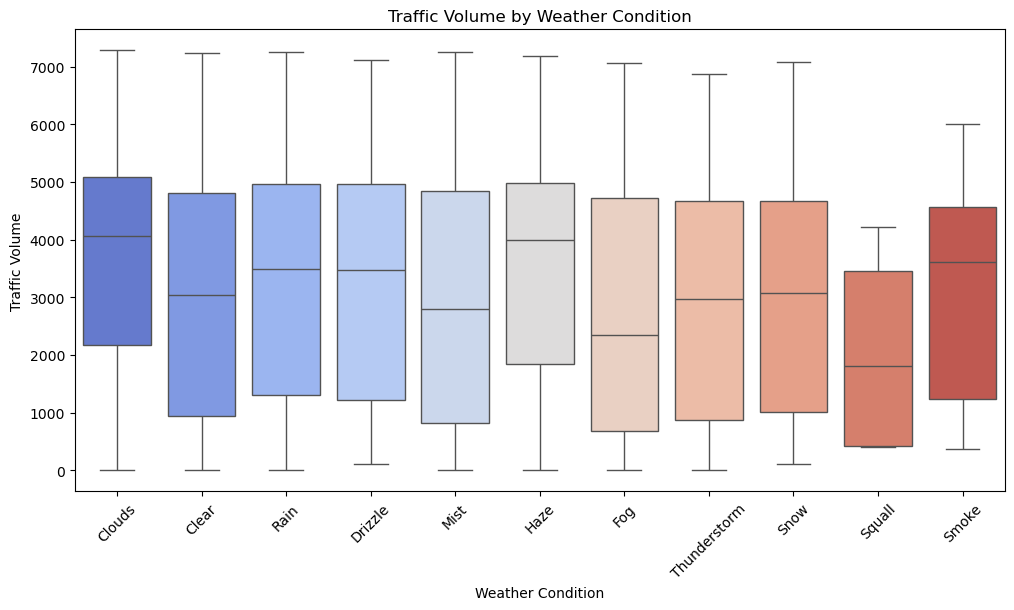

In [37]:
#Explore how traffic volume changes with temperature.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_traffic, x='weather_main', y='traffic_volume', palette='coolwarm')
plt.title('Traffic Volume by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()


## Insights:
The box plot reveals that cloudy conditions have the highest median traffic volume (around 4,000 vehicles), while squall shows the lowest (around 1,800). Most weather conditions maintain traffic volumes between 2,500-4,000 vehicles, with maximum peaks around 7,000. Severe weather conditions (snow, squall, smoke) generally show lower traffic volumes, suggesting drivers are more cautious or avoid travel. The data shows considerable variability across all weather types, with large interquartile ranges and numerous outliers, particularly in clear and cloudy conditions.

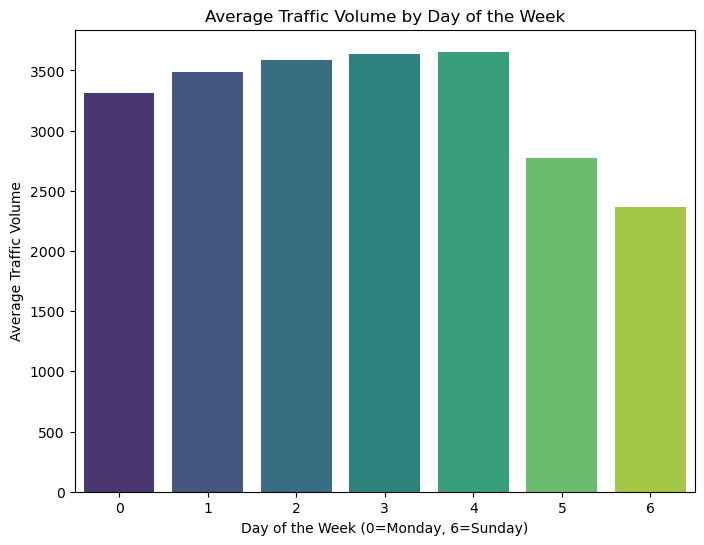

In [39]:
#Compare average traffic volume across weekdays and weekends.

avg_traffic = df_traffic.groupby('weekday')['traffic_volume'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_traffic, x='weekday', y='traffic_volume', palette='viridis')
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Traffic Volume')
plt.show()


## Insights:

### Traffic Patterns
- Peak traffic occurs during mid-week, with the highest volumes on Thursday (approximately 3,600 vehicles)
- Weekdays (Monday through Thursday) consistently maintain higher traffic levels above 3,000 vehicles

### Weekend Effect
- A significant drop in traffic volume is observed on weekends: Saturday shows around 2,800 vehicles
- Sunday records the lowest traffic at approximately 2,400 vehicles
- This clear weekday-weekend pattern suggests this could be related to commuter traffic, with working days showing substantially higher volumes than non-working days


In [41]:
# Purpose: Identify trends and interactions involving multiple variables.
# Line plot: Traffic Volume by Hour of Day (Weekdays vs Weekends)

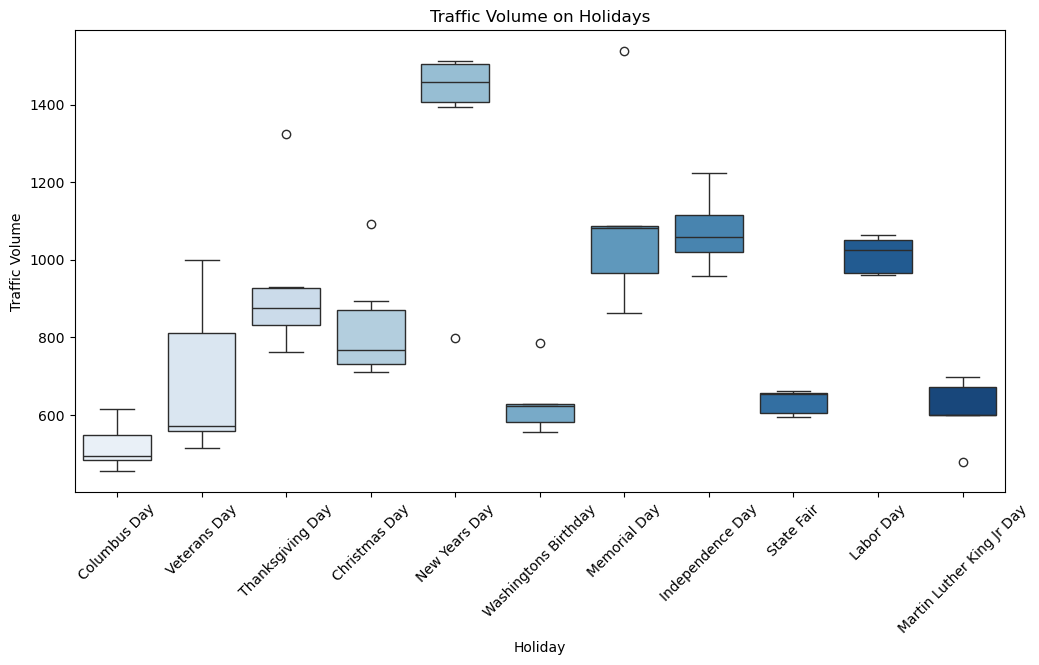

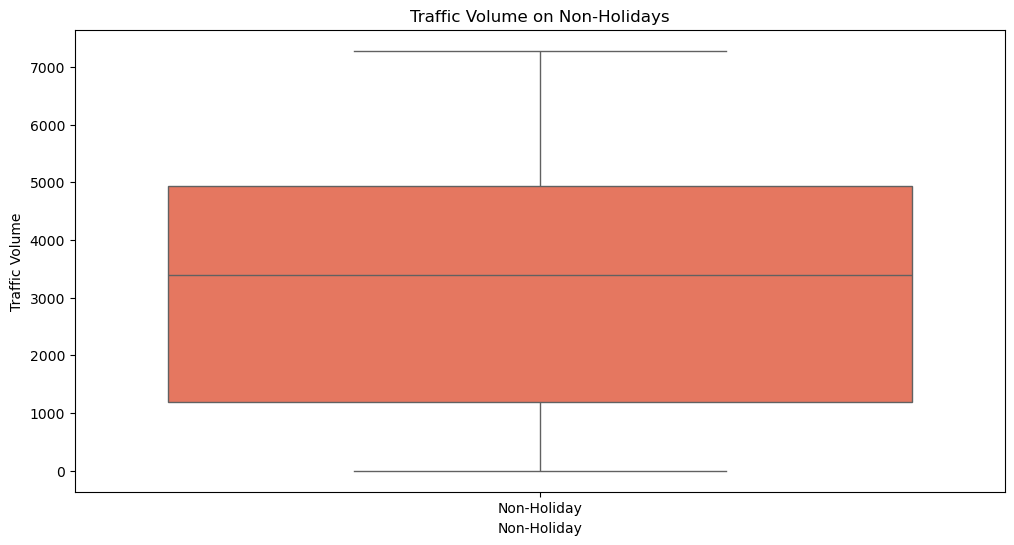

In [42]:
# Separate the data into holidays and non-holidays
holiday_data = df_traffic[df_traffic['holiday'] != 'Non-Holiday']  # Adjust 'None' to match your dataset's value for non-holidays
non_holiday_data = df_traffic[df_traffic['holiday'] == 'Non-Holiday']

# Plot for holidays
plt.figure(figsize=(12, 6))
sns.boxplot(data=holiday_data, x='holiday', y='traffic_volume', palette='Blues')
plt.title('Traffic Volume on Holidays')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()

# Plot for non-holidays
plt.figure(figsize=(12, 6))
sns.boxplot(data=non_holiday_data, y='traffic_volume', palette='Reds')
plt.title('Traffic Volume on Non-Holidays')
plt.ylabel('Traffic Volume')
plt.xlabel('Non-Holiday')
plt.xticks([0], ['Non-Holiday'])
plt.show()


## Interpretation

### Peak Holiday Traffic
- New Year's Day leads with 1,400 vehicles, while Independence Day and Memorial Day follow at 1,000 vehicles each.

### Traffic Clusters
- High (1100-1400): New Year's Day, Memorial Day, Washington's Birthday
- Medium (900-1000): Veterans Day, Thanksgiving, Labor Day
- Low (500-700): Columbus Day, MLK Jr Day

### Holiday vs Non-Holiday
- Non-holiday traffic shows higher volumes (median ~3,500) and greater variability (0-7,000 vehicles) compared to holidays (500-1,400 vehicles).


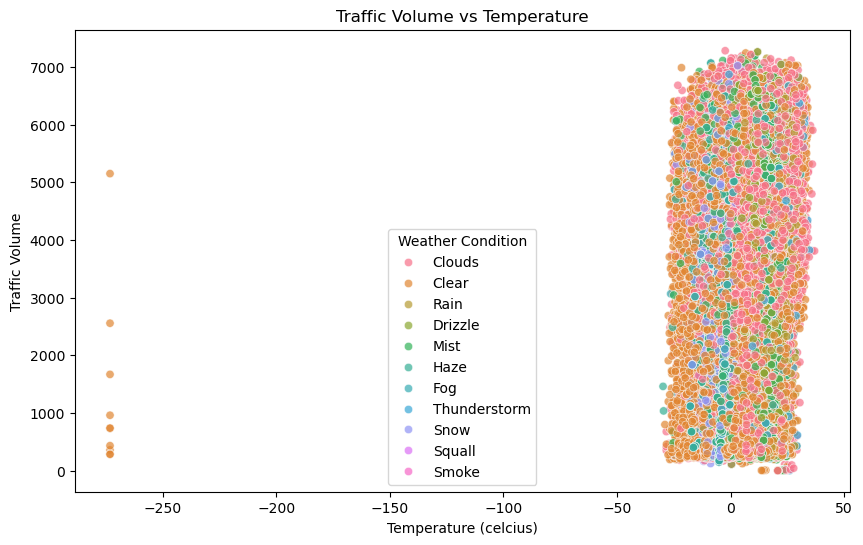

In [44]:
# Purpose: Observe pairwise relationships between features.

# Scatter plot: Traffic Volume vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_traffic, x='temp_celsius', y='traffic_volume', hue='weather_main', alpha=0.7)
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Temperature (celcius)')
plt.ylabel('Traffic Volume')
plt.legend(title='Weather Condition')
plt.show()

### Insights:
## Temperature and Traffic Analysis

- The temperature values are in Celsius, with most traffic measurements clustering between 0°C and 25°C, and outliers like -250°C indicating data errors. Clear and cloudy weather dominate, while precipitation is more common near or below 0°C. Traffic volumes consistently range from 0 to 7,000 vehicles, suggesting temperature alone does not heavily influence traffic patterns. Data preprocessing is needed to address temperature anomalies.

## 4.3 Multivariate Analysis

In [47]:
# Purpose: Quantify relationships between numeric columns and traffic volume
# Select only numeric columns
numeric_columns = df_traffic.select_dtypes(include=['number'])

# Compute the full correlation matrix for all numeric columns
correlation_matrix = numeric_columns.corr()

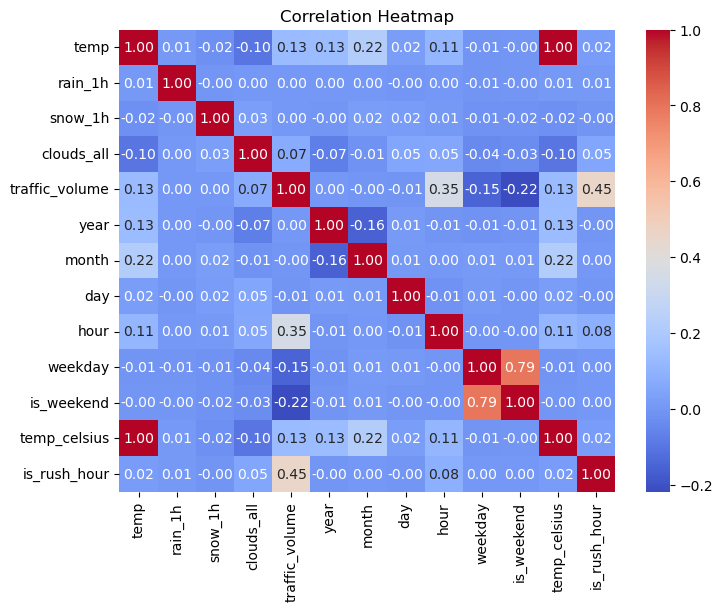

In [48]:
# Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Interpretation

### Traffic Patterns
- Traffic volume shows moderate positive correlation with rush hours (0.45) and hour of day (0.35), while having weak negative correlations with weekends (-0.22).

### Weather Impact
- Weather variables (rain, snow, cloud cover) show minimal correlation with traffic patterns, suggesting limited impact on traffic volume.


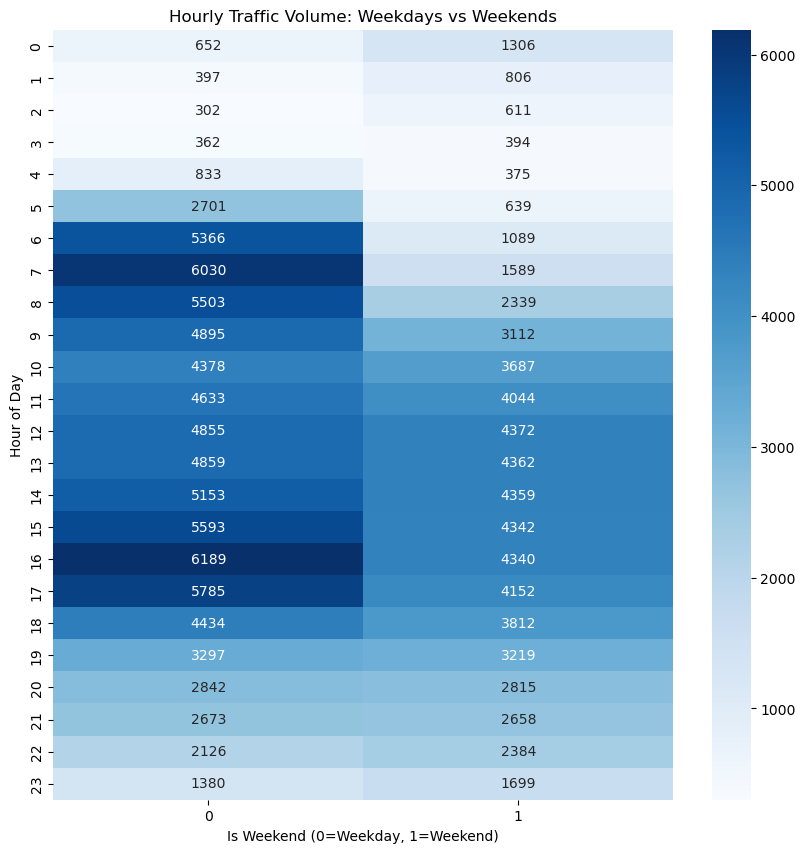

In [50]:
# Visualize how traffic volume varies by hour and weekday/weekend.

traffic_pivot = df_traffic.pivot_table(values='traffic_volume', index='hour', columns='is_weekend', aggfunc='mean')
plt.figure(figsize=(10, 10))
sns.heatmap(traffic_pivot, cmap='Blues', annot=True, fmt=".0f", cbar=True)
plt.title('Hourly Traffic Volume: Weekdays vs Weekends')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Hour of Day')
plt.show()


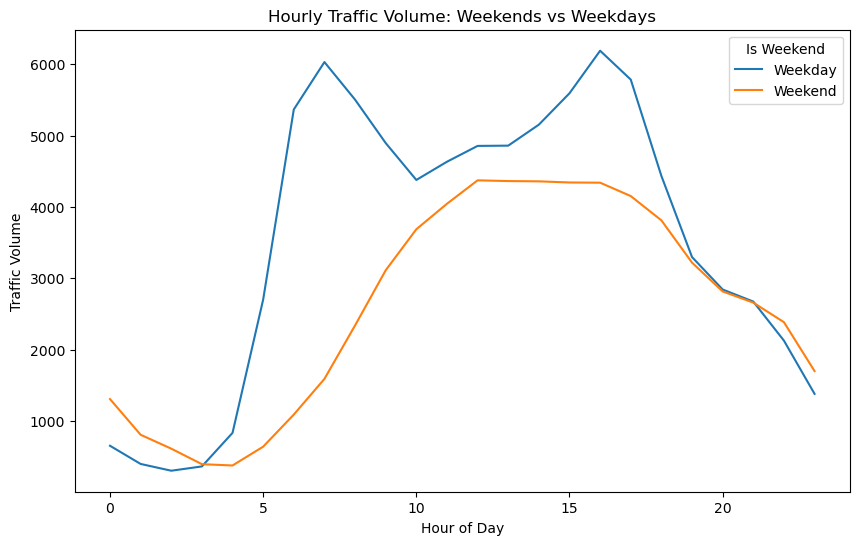

In [51]:
## lineplot of the above grapgh given as a heat map
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_traffic, x='hour', y='traffic_volume', hue='is_weekend', ci=None)
plt.title('Hourly Traffic Volume: Weekends vs Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.show()

## Insights:
### Peak Hours
- Weekdays show distinct peaks at 7-8 AM (around 6,030 vehicles) and 4-5 PM (around 6,189 vehicles), while weekend traffic peaks later at 11 AM-2 PM (~4,400 vehicles). Early morning (12-5 AM) shows minimum traffic for both weekdays and weekends, with weekday traffic sharply increasing from 5 AM while weekend traffic rises gradually.

- The largest disparity occurs during morning rush hours (6-9 AM), with weekday traffic showing work schedule-aligned fluctuations while weekend traffic maintains a more even distribution throughout the day.

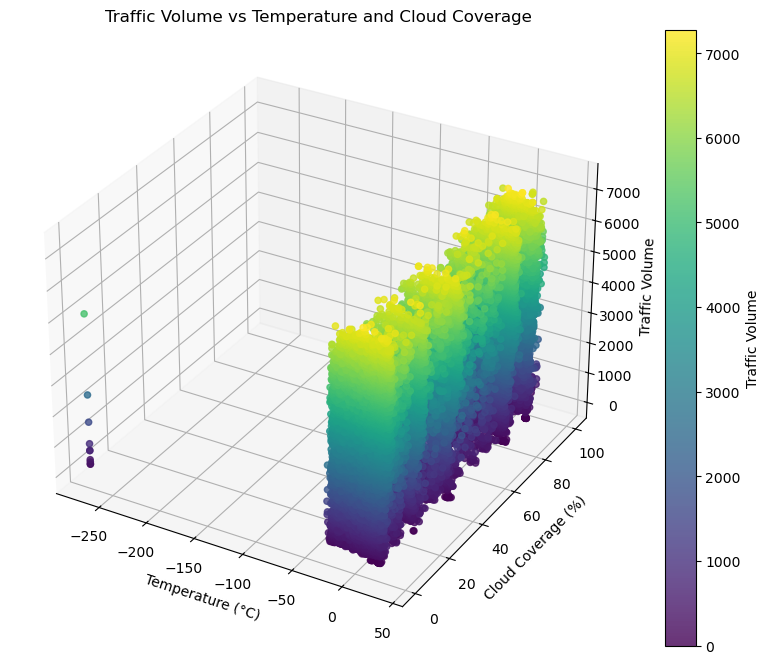

In [53]:
from mpl_toolkits.mplot3d import Axes3D
###  Explore how traffic volume depends on temperature and cloudiness.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_traffic['temp_celsius'], df_traffic['clouds_all'], df_traffic['traffic_volume'], c=df_traffic['traffic_volume'], cmap='viridis', alpha=0.8)
ax.set_title('Traffic Volume vs Temperature and Cloud Coverage')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Cloud Coverage (%)')
ax.set_zlabel('Traffic Volume')
fig.colorbar(scatter, label='Traffic Volume')
plt.show();

## Insights:
<!-- Helps understand how traffic varies under combined weather conditions (temperature and cloud coverage).
Identifies patterns like reduced traffic in overcast weather with extreme temperatures. -->

The 3D plot shows three key relationships:

1. Traffic volume ranges from 0 to 7000 vehicles, represented by a color gradient from purple (low) to yellow (high)

2. Higher cloud coverage (80-100%) correlates with increased traffic volumes, shown by the yellow-green regions

3. There appears to be some anomalous temperature readings (around -250°C) that should be investigated, as these values are physically impossible

The visualization effectively demonstrates that cloud coverage has a significant positive correlation with traffic volume, though the temperature data requires validation.

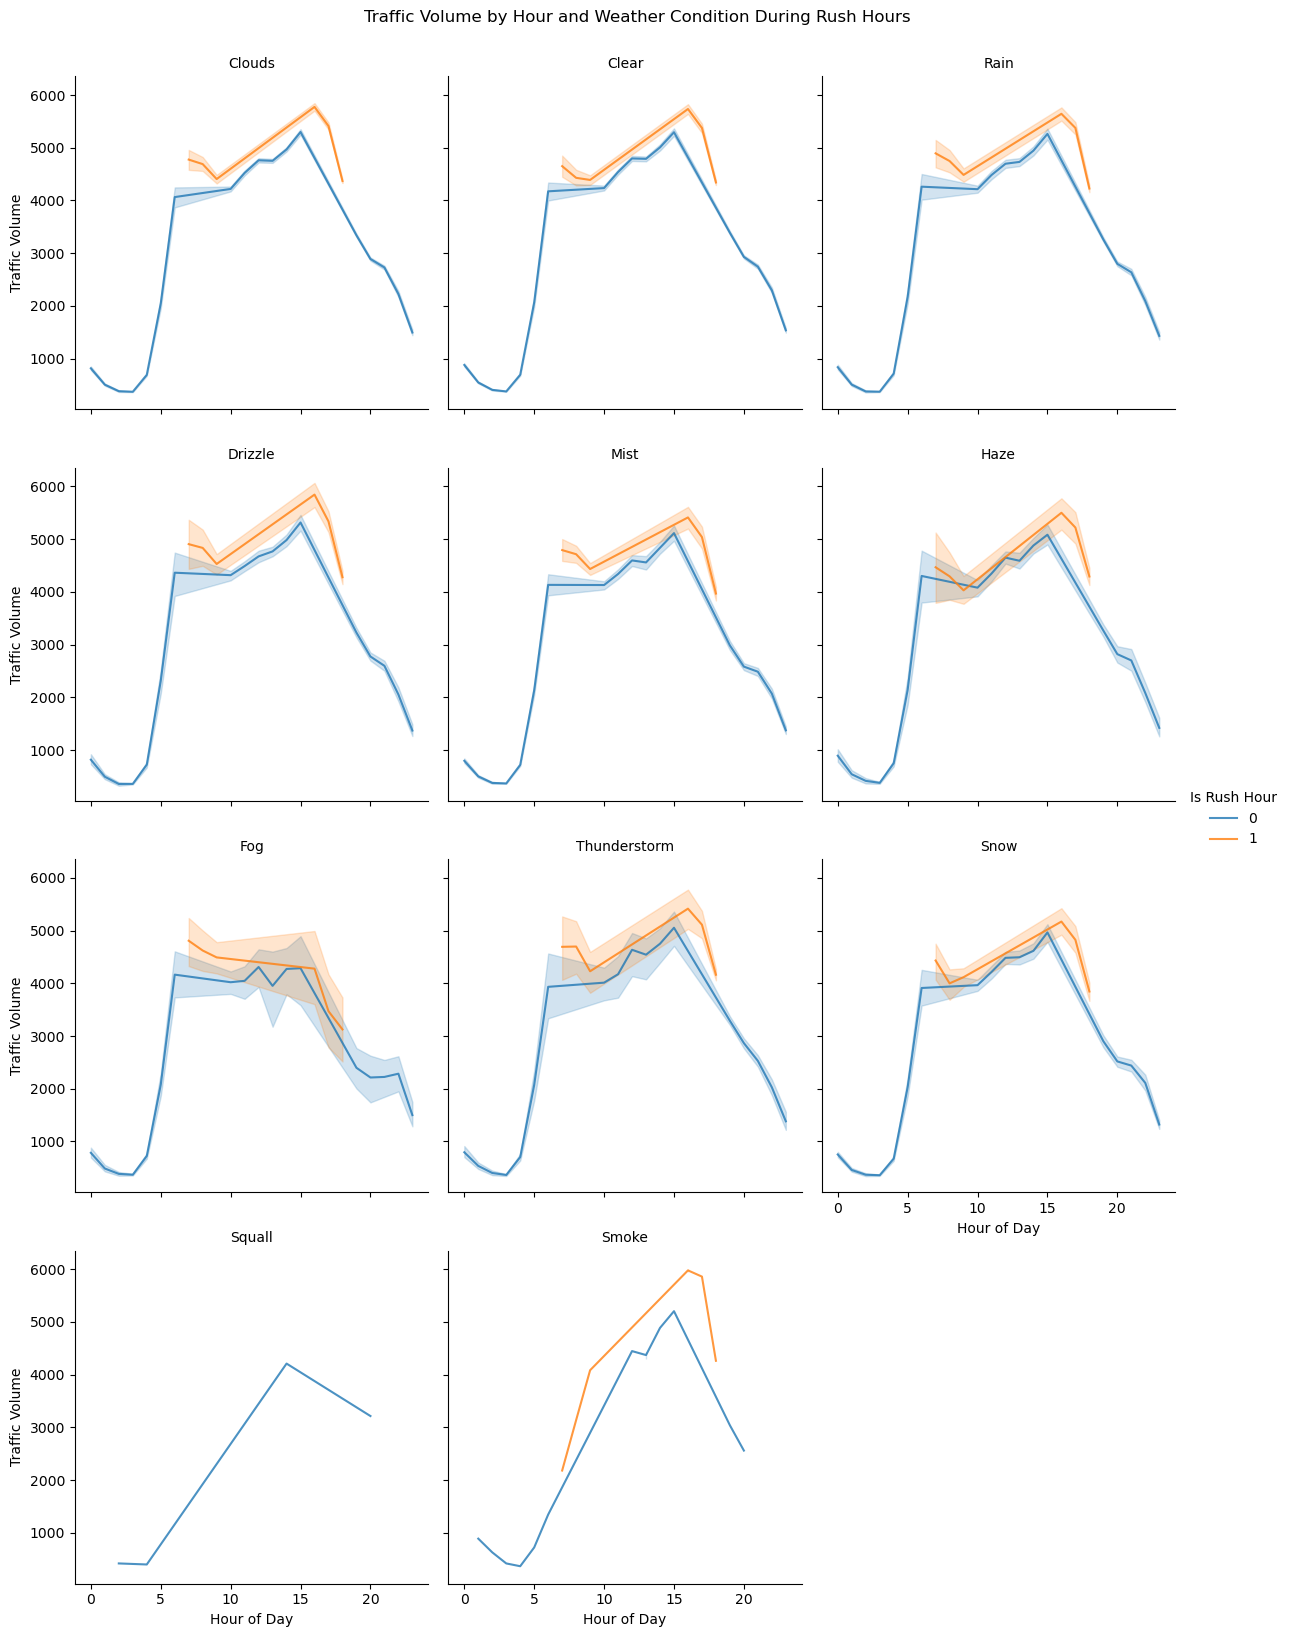

In [55]:
## Objective: Analyze traffic patterns by hour and weather condition during rush hours.
g = sns.FacetGrid(df_traffic, col='weather_main', hue='is_rush_hour', col_wrap=3, height=4)
g.map(sns.lineplot, 'hour', 'traffic_volume', alpha=0.8)
g.add_legend(title='Is Rush Hour')
g.set_titles('{col_name}')
g.set_axis_labels('Hour of Day', 'Traffic Volume')
g.fig.suptitle('Traffic Volume by Hour and Weather Condition During Rush Hours', y=1.02)
plt.show()


### Insights:
- The analysis reveals consistent daily traffic patterns across various weather conditions, with peak volumes occurring between 3-5 PM. Clear and cloudy conditions show the highest and most consistent traffic volumes, while precipitation and reduced visibility conditions generally lead to slightly lower volumes. Rush hours consistently show higher traffic volumes compared to non-rush hours, with the difference being most pronounced during peak periods. Severe weather conditions, particularly fog and thunderstorms, exhibit more variability in traffic patterns and wider confidence intervals.

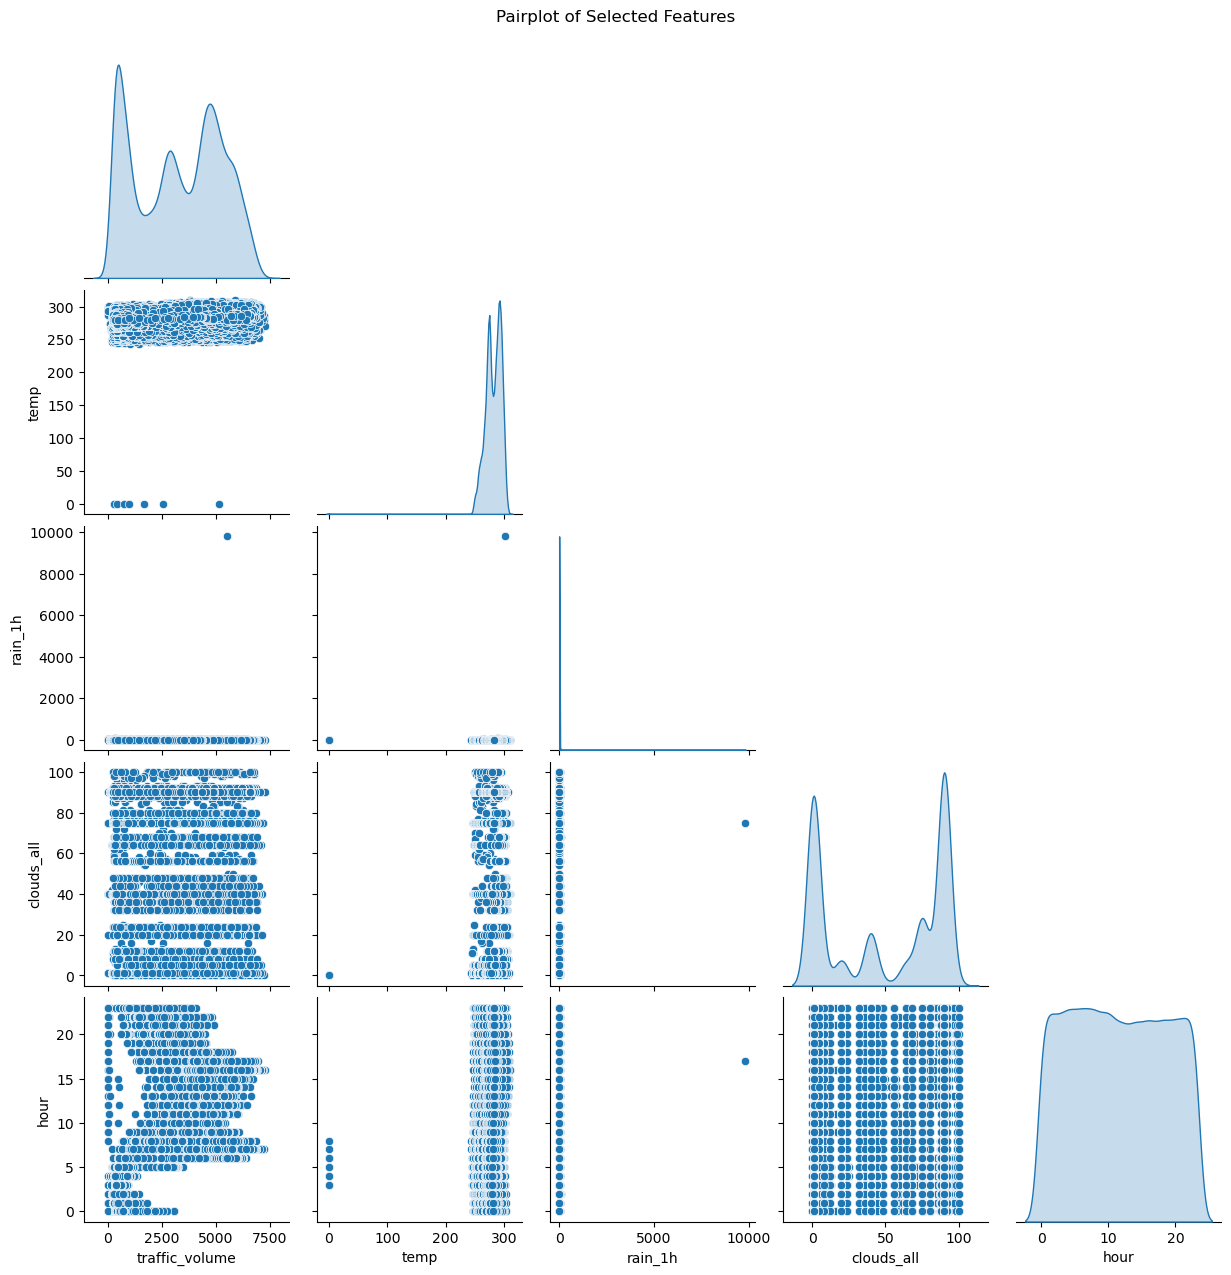

In [57]:
# Purpose: Analyze how multiple features interact and impact traffic volume.

# Pairplot
selected_features = ['traffic_volume', 'temp', 'rain_1h', 'clouds_all', 'hour']
sns.pairplot(df_traffic[selected_features], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Distribution Analysis
- The pairplot highlights key patterns: traffic volume shows distinct daily trends, clustering densely between 2,500–5,000 vehicles, with notable rush hour peaks. Temperature exhibits a bimodal distribution, suggesting seasonal variations, while rainfall is highly skewed with sparse extreme outliers. Cloud cover appears uniformly distributed but shows clustering tied to specific weather conditions. Outliers in rainfall and temperature suggest potential data quality issues requiring further investigation.

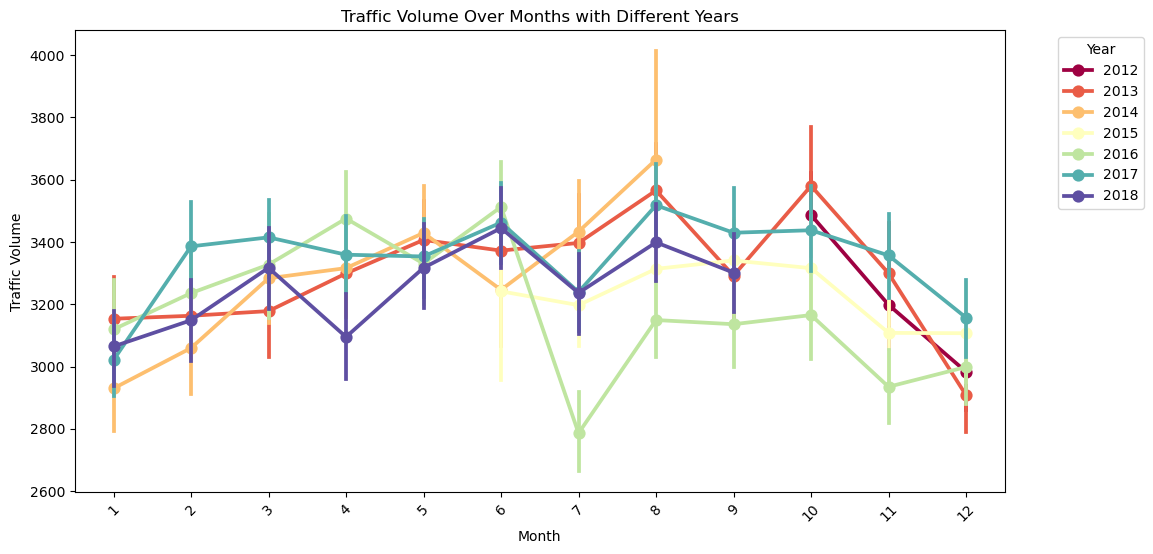

In [59]:
# Extract Year and Month from Date_Time
df_traffic['month_name'] = df_traffic['date_time'].dt.month_name()

# Set the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_traffic['month_name'] = pd.Categorical(df_traffic['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))  # Set the figure size

# Line plot with hues for different years
sns.pointplot(x='month', y='traffic_volume', hue='year', data=df_traffic, palette='Spectral')
plt.title('Traffic Volume Over Months with Different Years')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Interpretation

The traffic volume plot from 2012-2018 shows several key insights:

## Key Patterns
- Traffic peaks occur in August, with 2014 showing the highest volume at ~4,000 vehicles
- Lowest volumes consistently appear in December, dropping to ~3,000 vehicles
- 2016 shows an unusual dip in July (around 2,800 vehicles)

## Overall Trends
- Most years follow similar seasonal patterns
- Traffic volumes typically range between 2,800-4,000 vehicles
- Error bars indicate measurement variability throughout the months
- General upward trend from January to August, followed by decline through year-end

In [61]:
## creating a exact copy of the original dataframe
df_model = df_traffic.copy()

## After conducting Exploratory Data Analysis (EDA), several data preprocessing and feature engineering steps were implemented to enhance the dataset for model prediction:
- Outlier Removal: Extreme temperature values below -250 were removed from the dataset to eliminate unrealistic outliers.
- Holiday Feature Enhancement: The holiday column was adjusted to mark all samples collected on a holiday as a holiday, rather than just one sample per day. This significantly increased the representation of holidays in the dataset, providing a more accurate reflection of holiday traffic patterns.
- Feature Selection: Unnecessary columns such as 'date_time' and 'temp' were dropped from the dataset.
Categorical Encoding: Ordinal encoding was applied to categorical columns including 'holiday', 'weather_main', 'weather_description', and 'month_name'.
- Feature Scaling: StandardScaler was used to normalize the feature set, ensuring all features are on a similar scale for model training.
- Correlation Analysis: A correlation matrix was computed and visualized using a heatmap to understand the relationships between features and the target variable (traffic_volume).
- Data Splitting: The dataset was split into training and testing sets (75% train, 25% test) for model evaluation.


In [63]:
#Outlier in temp which was detected earlier needs to be removed
df_model = df_model.loc[df_traffic.temp>-250]

In [64]:
### Analysing holiday column mode based on EDA as we have very less count of total holiday compare to total count
df_model[df_model['holiday']!='Non-Holiday']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,weekday,is_weekend,temp_celsius,is_rush_hour,month_name
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08,455,2012,10,8,0,0,0,-0.070,0,October
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12,1000,2012,11,12,0,0,0,14.970,0,November
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22,919,2012,11,22,0,3,0,5.390,0,November
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25,803,2012,12,25,0,1,0,-8.750,0,December
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01,1439,2013,1,1,0,1,0,-9.660,0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28,1088,2018,5,28,0,0,0,26.337,0,May
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04,1021,2018,7,4,0,2,0,24.400,0,July
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23,596,2018,8,23,0,3,0,15.870,0,August
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03,962,2018,9,3,0,0,0,19.280,0,September


In [65]:
df_model[df_model['date_time']=='2012-11-12']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,weekday,is_weekend,temp_celsius,is_rush_hour,month_name
1123,Veterans Day,288.12,0.0,0.0,87,Clear,sky is clear,2012-11-12,1000,2012,11,12,0,0,0,14.97,0,November


###  in the above two dataframe results we can see that one One Sample per Holiday is marked as a holiday & and samples collected for the rest of the day are not marked as a holiday.
### I will take the dates of the Holidays and will use it to mark all the samples collected on that same day as a Holiday.

In [67]:
df_model['holiday'].value_counts()

holiday
Non-Holiday                  48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [68]:
isHoliday = df_model.holiday!='Non-Holiday'
date = df_model.date_time[isHoliday].dt.date.values
holiday = df_model.holiday[isHoliday].values

mapping = dict(zip(date,holiday))

df_model['holiday'] = df_model['date_time'].dt.date.map(mapping)
df_model.loc[df_model['holiday'].isna(),'holiday'] = 'Work Day'

df_model['holiday'].value_counts()

holiday
Work Day                     46778
Labor Day                      157
Washingtons Birthday           136
Thanksgiving Day               135
Memorial Day                   134
Christmas Day                  131
New Years Day                  131
Independence Day               126
Veterans Day                   120
State Fair                     120
Columbus Day                   112
Martin Luther King Jr Day      107
Name: count, dtype: int64

In [69]:
##dropping date_time column
df_model  = df_model.drop(['date_time','temp'],axis=1)

## you can clearly see the changes in the value count from before and after

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [72]:
# Columns to encode
categorical_columns = ['holiday', 'weather_main', 'weather_description', 'month_name']
# Initialize the encoder
encoder = OrdinalEncoder()
df_model[categorical_columns] = encoder.fit_transform(df_model[categorical_columns])

In [73]:
# Feature Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_model)

In [74]:
df_model_scaled = pd.DataFrame(scaled_df,columns=df_model.columns)
df_model_scaled

,holiday,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday,is_weekend,temp_celsius,is_rush_hour,month_name
0,0.152908,-0.007464,-0.027233,-0.240049,-0.567017,0.831708,1.150205,-1.854915,1.027795,-1.574987,-0.345481,-0.989478,-0.630279,0.530416,1.728774,1.351593
1,0.152908,-0.007464,-0.027233,0.657047,-0.567017,-1.621057,0.632322,-1.854915,1.027795,-1.574987,-0.201395,-0.989478,-0.630279,0.611384,-0.578445,1.351593
2,0.152908,-0.007464,-0.027233,1.041516,-0.567017,0.274261,0.758647,-1.854915,1.027795,-1.574987,-0.057309,-0.989478,-0.630279,0.627877,-0.578445,1.351593
3,0.152908,-0.007464,-0.027233,1.041516,-0.567017,0.274261,0.888999,-1.854915,1.027795,-1.574987,0.086777,-0.989478,-0.630279,0.669111,-0.578445,1.351593
4,0.152908,-0.007464,-0.027233,0.657047,-0.567017,-1.621057,0.834644,-1.854915,1.027795,-1.574987,0.230863,-0.989478,-0.630279,0.744831,-0.578445,1.351593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,0.152908,-0.007464,-0.027233,0.657047,-0.567017,-1.621057,0.142623,1.314032,0.733699,1.635434,1.095379,1.503020,1.586600,0.168309,-0.578445,1.642574
48183,0.152908,-0.007464,-0.027233,1.041516,-0.567017,0.274261,-0.240883,1.314032,0.733699,1.635434,1.239465,1.503020,1.586600,0.116579,-0.578445,1.642574
48184,0.152908,-0.007464,-0.027233,1.041516,2.665604,0.497240,-0.553928,1.314032,0.733699,1.635434,1.383551,1.503020,1.586600,0.114330,-0.578445,1.642574
48185,0.152908,-0.007464,-0.027233,1.041516,-0.567017,0.274261,-0.910759,1.314032,0.733699,1.635434,1.527637,1.503020,1.586600,0.066349,-0.578445,1.642574


In [75]:
correlation_matrix = df_model_scaled.corr()
print(correlation_matrix['traffic_volume'].sort_values(ascending=False))

traffic_volume         1.000000
is_rush_hour           0.454132
hour                   0.352300
temp_celsius           0.130161
clouds_all             0.067138
holiday                0.063921
month_name             0.015935
rain_1h                0.004715
year                   0.004697
snow_1h                0.000736
month                 -0.002480
day                   -0.007760
weather_main          -0.040149
weather_description   -0.067533
weekday               -0.149551
is_weekend            -0.218533
Name: traffic_volume, dtype: float64


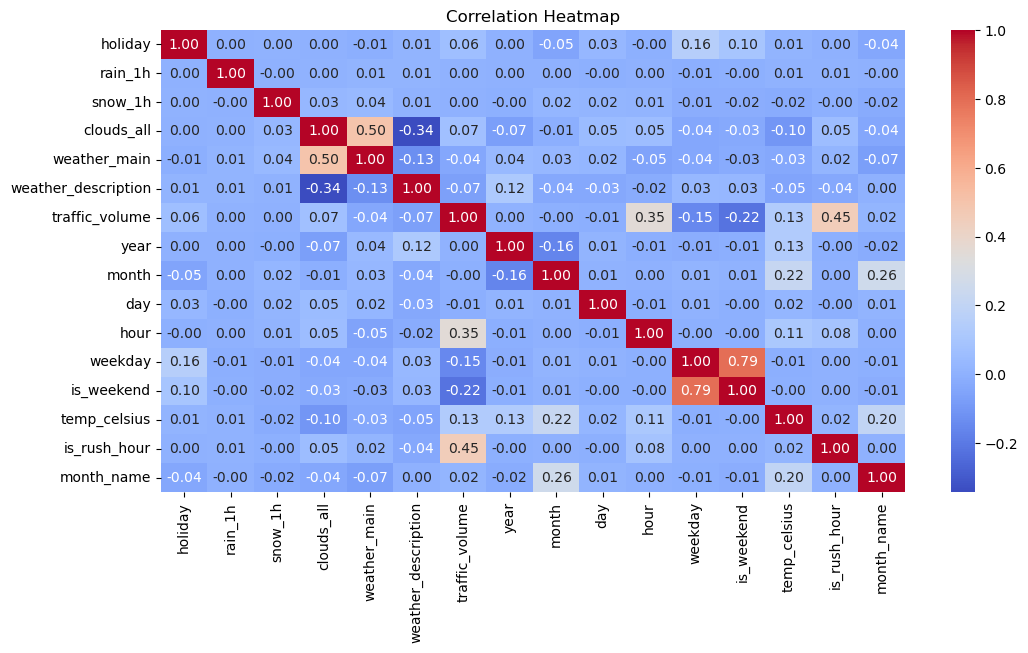

In [76]:
# Purpose: Quantify relationships between numeric columns and traffic volume
# Compute the full correlation matrix for all numeric columns
correlation_matrix = df_model_scaled.corr()
# Heatmap of Correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [78]:
## splitting the data for the model
X = df_model_scaled.drop('traffic_volume',axis=1)
Y = df_model_scaled['traffic_volume']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


# 5. Regression Analysis

In [80]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 5.1 Simple Linear Regression
- This model uses a single feature (is_rush_hour) to predict traffic volume. It's useful for understanding the basic relationship between rush hour and traffic volume.

In [82]:
results = []
simple_lr = LinearRegression()
simple_lr.fit(x_train[['is_rush_hour']], y_train)
y_pred = simple_lr.predict(x_test[['is_rush_hour']])
results.append({
    'Model Algorithm': 'Simple Linear Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# 5.2 Multiple Linear Regression
- This model incorporates all available features to predict traffic volume. It's beneficial for capturing linear relationships between multiple variables and the target.

In [84]:
# Fit model
multi_lr = LinearRegression()
multi_lr.fit(x_train, y_train)

# Predictions
y_pred = multi_lr.predict(x_test)
results.append({
    'Model Algorithm': 'Multiple Linear Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# 5.3 Polynomial Regression
- A polynomial regression of degree 2 was implemented. This model can capture non-linear relationships in the data, potentially providing a better fit for complex patterns in traffic volume.

In [86]:
# Fit and evaluate Polynomial Regression (degree=2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(x_train, y_train)
y_pred = poly.predict(x_test)
results.append({
    'Model Algorithm': 'Polynomial Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# 5.4 Logistic Regression
- Our data have continuous target value so this model is not useful but if we have to use a logistic Model, the target variable can be changed into two categories: high traffic (if target is greater than median) and low traffic(if target is less than median).

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert target to binary classification
df_model['traffic_volume_binary'] = (df_model['traffic_volume'] > df_model['traffic_volume'].median()).astype(int)

# Train-test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, df_model['traffic_volume_binary'], test_size=0.25, random_state=42)

# Fit model
logistic = LogisticRegression()
logistic.fit(x_train1, y_train1)

# Predictions
y_pred1 = logistic.predict(x_test1)

# Evaluation metrics
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

# Display results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Logistic Regression Results:
Accuracy: 0.66
Precision: 0.68
Recall: 0.61
F1 Score: 0.64


# 5.5 Regularization Techniques
### Three regularization methods were applied to both linear and polynomial regression:
- Lasso Regression: Useful for feature selection by encouraging sparsity in the model coefficients.
- Ridge Regression: Helps in reducing multicollinearity and preventing overfitting.
- ElasticNet Regression: Combines Lasso and Ridge, balancing between feature selection and coefficient shrinkage.


In [90]:
### For Linear regression
# Lasso Regularization to Simple Linear Regression
lasso = Lasso(alpha=0.1) 
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
results.append({
    'Model Algorithm': 'Lasso Multi-Linear Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# Ridge Regularization to Simple Linear Regression
ridge = Ridge(alpha=0.1) 
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
results.append({
    'Model Algorithm': 'Ridge Multi-Linear Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# ElasticNet Regularization to Simple Linear Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)
results.append({
    'Model Algorithm': 'ElasticNet Multi-Linear Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

In [91]:
## For polynomial linear regression
# Lasso Regularization to Polynomial Regression
lasso_poly = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1))
lasso_poly.fit(x_train, y_train)
y_pred = lasso_poly.predict(x_test)
results.append({
    'Model Algorithm': 'Lasso Polynomial Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# Ridge Regularization to Polynomial Regression
ridge_poly = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))
ridge_poly.fit(x_train, y_train)
y_pred = ridge_poly.predict(x_test)
results.append({
    'Model Algorithm': 'Ridge Polynomial Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})

# ElasticNet Regularization to Polynomial Regression
elastic_net_poly = make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=0.1, l1_ratio=0.5))
elastic_net_poly.fit(x_train, y_train)
y_pred = elastic_net_poly.predict(x_test)
results.append({
    'Model Algorithm': 'ElasticNet Polynomial Regression',
    'R2 Score': metrics.r2_score(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
})


# 6. Model Evaluation and Comparison

In [93]:
results_df = pd.DataFrame(results)
results_df

,Model Algorithm,R2 Score,RMSE
0,Simple Linear Regression,0.203127,0.889929
1,Multiple Linear Regression,0.372399,0.789774
2,Polynomial Regression,0.782878,0.464529
3,Lasso Multi-Linear Regression,0.325581,0.818702
4,Ridge Multi-Linear Regression,0.372399,0.789774
5,ElasticNet Multi-Linear Regression,0.352379,0.802271
6,Lasso Polynomial Regression,0.717127,0.530220
7,Ridge Polynomial Regression,0.782867,0.464541
8,ElasticNet Polynomial Regression,0.748543,0.499911


### Based on the results:
- Polynomial Regression models outperformed linear models significantly, with the highest R2 score of `0.783` and lowest RMSE of `0.465`. This suggests that the relationship between the features and traffic volume is non-linear.
- Among linear models, Multiple Linear Regression and Ridge Regression performed equally well (R2: `0.372`, RMSE: `0.790`), indicating that multicollinearity might not be a significant issue in the dataset.
- Lasso and ElasticNet regularization slightly underperformed compared to standard Multiple Linear Regression, suggesting that aggressive feature selection or coefficient shrinkage may not be beneficial for this dataset.
- Simple Linear Regression performed poorly (R2: `0.203`), indicating that using only the `is_rush_hour` feature is insufficient for accurate -traffic volume prediction.
- In polynomial models, Ridge Regularization performed marginally better than standard Polynomial Regression, suggesting a slight benefit from coefficient shrinkage in the higher-dimensional feature space.

The superior performance of Polynomial Regression models indicates that the relationship between the features and traffic volume is complex and nonlinear. The slight improvement with Ridge regularization in polynomial models suggests that some degree of regularization helps in managing the increased complexity and potential overfitting in the polynomial feature space.

# 7. Results and Interpretation

## Summary of Findings
### The analysis of the Metro Interstate Traffic Volume dataset yielded several key findings that align with the project objectives:

- Traffic Pattern Analysis:
    - Weekday traffic shows distinct peaks at 7-8 AM (around 6,030 vehicles) and 4-5 PM (around 6,189 vehicles), corresponding to typical rush hours.
    - Weekend traffic peaks later, between 11 AM-2 PM (around 4,400 vehicles), with a more even distribution throughout the day.
    - Traffic volumes are consistently higher on weekdays compared to weekends, with Thursday showing the highest average volume (around 3,600 vehicles) and Sunday the lowest ( around2,400 vehicles).

- Impact of Weather Conditions:
    - Clear and cloudy conditions generally show the highest and most consistent traffic volumes.
    - Severe weather conditions, such as fog and thunderstorms, lead to slightly lower traffic volumes and exhibit more variability in traffic patterns.
    - Surprisingly, weather variables (rain, snow, cloud cover) showed minimal correlation with traffic patterns, suggesting a limited impact on  overall traffic volume.

- Holiday and Event Effects:
    - Non-holiday traffic shows higher volumes (median 3,500 vehicles) and greater variability (0-7,000 vehicles) compared to holidays (500-1,400 vehicles).
    - New Year's Day leads holiday traffic with 1,400 vehicles, followed by Independence Day and Memorial Day at 1,000 vehicles each.

- Prediction Modeling:
    - Polynomial Regression models outperformed linear models significantly, achieving the highest R2 score of 0.783 and lowest RMSE of 0.465.
    - Simple Linear Regression using only the 'is_rush_hour' feature performed poorly (R2: 0.203), indicating the complexity of traffic prediction2.
    - Ridge Regularization in polynomial models showed slight improvement, suggesting benefits in managing complexity and potential overfitting.

## Insights and Implications

- Traffic Management:
    - Implement differentiated strategies for weekdays vs. weekends
    - Develop season-specific plans (peaks in August, lows in December)
- Weather Resilience:
    - Metro area shows weather-resilient transportation systems
    - Implement targeted safety measures for severe weather conditions
- Holiday Planning:
    - Schedule road maintenance during low-traffic holidays
    - Prepare special plans for high-traffic holidays (New Year's, Independence Day)
- Predictive Modeling:
    - Use complex, non-linear models for traffic volume prediction
    - Incorporate multiple features for accurate forecasting
- Data-Driven Decisions:
    - Leverage insights for urban planning and infrastructure development
    - Invest in advanced analytics for improved traffic management

These findings and insights provide a solid foundation for improving traffic management, optimizing urban transportation infrastructure, and enhancing overall mobility in the metropolitan area. The data-driven approach demonstrated in this analysis can serve as a model for other urban areas seeking to address similar traffic challenges.

### 9. References
- UCI Machine Learning Repository. (2020). Metro Interstate Traffic Volume Dataset.
- The Python Workshop - Second Edition by Corey Wade, Mario Corchero Jiménez, Andrew Bird, Dr. Lau Cher Han, and Graham Lee. Packt Publishing, 2022. ISBN: 978-1-80461-061-9.
- VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.

In [98]:
print('That Concludes the Report')

That Concludes the Report
